In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
import nltk
import re

In [4]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
data = {
    "date": pd.date_range(start="2025-01-01", periods=10),
    "text": [
        "I love this product! It's amazing.",
        "Worst experience ever. Totally disappointed.",
        "Not bad, but could be better.",
        "Absolutely fantastic! Highly recommend.",
        "Terrible service. Never buying again.",
        "Pretty good overall. Satisfied.",
        "Horrible. Waste of money.",
        "Superb! Exceeded my expectations.",
        "Mediocre quality, but okay for the price.",
        "Outstanding performance and great value!"
    ]
}
df = pd.DataFrame(data)

In [6]:
def clean_text(text):
    text = text.lower()  # lowercase
    text = re.sub(r'http\S+', '', text)  # remove URLs
    text = re.sub(r'@\w+', '', text)  # remove mentions
    text = re.sub(r'#\w+', '', text)  # remove hashtags
    text = re.sub(r'[^a-z\s]', '', text)  # remove punctuation/numbers
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

df['clean_text'] = df['text'].apply(clean_text)


In [7]:
def get_sentiment(text):
    score = TextBlob(text).sentiment.polarity
    if score > 0:
        return "Positive"
    elif score < 0:
        return "Negative"
    else:
        return "Neutral"

df['sentiment'] = df['clean_text'].apply(get_sentiment)
df['polarity'] = df['clean_text'].apply(lambda x: TextBlob(x).sentiment.polarity)


/tmp/ipython-input-750326328.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=df, palette='coolwarm')


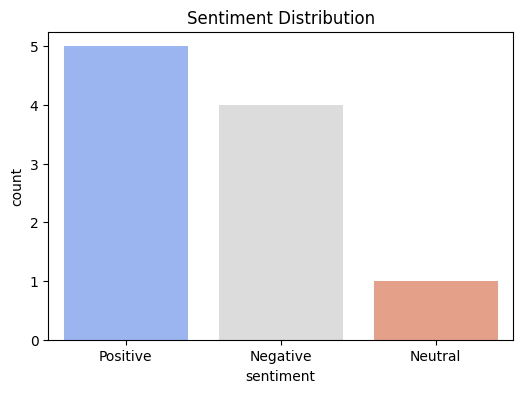

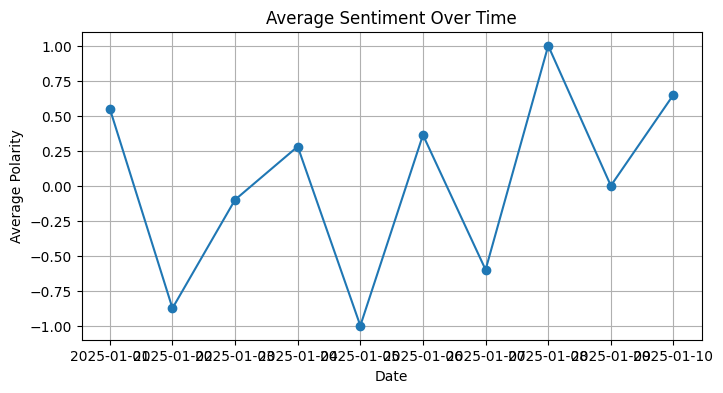

In [8]:
plt.figure(figsize=(6,4))
sns.countplot(x='sentiment', data=df, palette='coolwarm')
plt.title("Sentiment Distribution")
plt.show()

plt.figure(figsize=(8,4))
df.groupby(df['date'].dt.date)['polarity'].mean().plot(marker='o')
plt.title("Average Sentiment Over Time")
plt.xlabel("Date")
plt.ylabel("Average Polarity")
plt.grid(True)
plt.show()

In [9]:
print(df)

        date                                          text  \
0 2025-01-01            I love this product! It's amazing.   
1 2025-01-02  Worst experience ever. Totally disappointed.   
2 2025-01-03                 Not bad, but could be better.   
3 2025-01-04       Absolutely fantastic! Highly recommend.   
4 2025-01-05         Terrible service. Never buying again.   
5 2025-01-06               Pretty good overall. Satisfied.   
6 2025-01-07                     Horrible. Waste of money.   
7 2025-01-08             Superb! Exceeded my expectations.   
8 2025-01-09     Mediocre quality, but okay for the price.   
9 2025-01-10      Outstanding performance and great value!   

                                   clean_text sentiment  polarity  
0                        love product amazing  Positive    0.5500  
1  worst experience ever totally disappointed  Negative   -0.8750  
2                            bad could better  Negative   -0.1000  
3       absolutely fantastic highly recommend